In [ ]:
# 실행시 등장하는 URL을 클릭하여 허용해주면 인증KEY가 나타난다. 복사하여 URL아래 빈칸에 붙여넣으면 마운트에 성공하게된다.
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
%cd /content 
!git clone https://github.com/ultralytics/yolov5 
%cd yolov5 
%pip install -qr requirements.txt 

import torch
from IPython.display import Image, clear_output

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 10155, done.
remote: Total 10155 (delta 0), reused 0 (delta 0), pack-reused 10155
Receiving objects: 100% (10155/10155), 10.45 MiB | 22.97 MiB/s, done.
Resolving deltas: 100% (7037/7037), done.
/content/yolov5
     |████████████████████████████████| 596 kB 5.4 MB/s 


In [ ]:
#텍스트처럼 문장 쓰기
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
  with open(line, 'w') as f:
    f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/yolov5/helmet_and_ballcap.yaml

train: /content/gdrive/MyDrive/helmet_n_ballcap/images/train
test: /content/gdrive/MyDrive/helmet_n_ballcap/images/test
val: /content/gdrive/MyDrive/helmet_n_ballcap/images/valid

# number of classes
nc: 4

# class names
names: ['helmet', 'head', 'ballcap', 'person']

In [ ]:
!python train.py --img 416 --batch 100 --epochs 100 --data /content/yolov5/helmet_and_ballcap.yaml --cfg /content/yolov5/models/yolov5s.yaml --cache

train: weights=yolov5s.pt, cfg=/content/yolov5/models/yolov5s.yaml, data=/content/yolov5/helmet_and_ballcap.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=100, batch_size=100, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-133-g4fb6dd4 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, h

In [ ]:
!python val.py --weights runs/train/exp/weights/best.pt --data /content/yolov5/helmet_and_ballcap.yaml --img 416 --iou 0.8 --half

val: data=/content/yolov5/helmet_and_ballcap.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.8, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.0-133-g4fb6dd4 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning '/content/gdrive/MyDrive/helmet_n_ballcap/labels/valid.cache' images and labels... 1089 found, 0 missing, 0 empty, 1 corrupted: 100% 1090/1090 [00:00<?, ?it/s]
val: WARNING: /content/gdrive/MyDrive/helmet_n_ballcap/images/valid/88 (2).jpg: ignoring corrupt image/label: image file is truncated (0 bytes not processed)
val: WARNING: /content/gdrive/MyDrive/helmet_n_ballcap/images/valid/ballcap_20.jpg: corrupt JPEG restored and saved
               Class

In [ ]:
!python val.py --weights runs/train/exp/weights/best.pt --data /content/yolov5/helmet_and_ballcap.yaml --img 416 --task test

val: data=/content/yolov5/helmet_and_ballcap.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.6, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.0-133-g4fb6dd4 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning '/content/gdrive/MyDrive/helmet_n_ballcap/labels/test.cache' images and labels... 1040 found, 0 missing, 0 empty, 0 corrupted: 100% 1040/1040 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 33/33 [00:49<00:00,  1.50s/it]
                 all       1040       5276      0.649      0.612      0.653      0.385
              helmet       1040       3797      0.919      0.896      0.941      

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.4 --source /content/gdrive/MyDrive/helmet_n_ballcap/images/test

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/gdrive/MyDrive/helmet_n_ballcap/images/test, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-133-g4fb6dd4 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1040 /content/gdrive/MyDrive/helmet_n_ballcap/images/test/ballcap_100.jpg: 288x416 Done. (0.024s)
image 2/1040 /content/gdrive/MyDrive/helmet_n_ballcap/images/test/ballcap_61.jpg: 288x416 1 head, 2 ballcaps, Done. (0.022s)
image 3/1040 /content/gdrive/MyDrive/helmet_n_ballcap/images/test/ballcap_62.jpg: 160x416 19 ballcaps, Done. (0.022s)
image 4/1040 /co

In [ ]:
Image(filename='/content/yolov5/runs/detect/exp2/ballcap_99.jpg', width=500)

FileNotFoundError: ignored

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.4 --source /content/gdrive/MyDrive/KakaoTalk_20211209_000513828.mp4

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/gdrive/MyDrive/KakaoTalk_20211209_000513828.mp4, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-133-g4fb6dd4 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/2177) /content/gdrive/MyDrive/KakaoTalk_20211209_000513828.mp4: 256x416 3 helmets, 2 heads, Done. (0.044s)
video 1/1 (2/2177) /content/gdrive/MyDrive/KakaoTalk_20211209_000513828.mp4: 256x416 3 helmets, 2 heads, Done. (0.023s)
video 1/1 (3/2177) /content/gdrive/MyDrive/KakaoTalk_20211209_000513828.mp4: 256x416 3 helmets, 1 head, Done. (0.023s)
vi

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

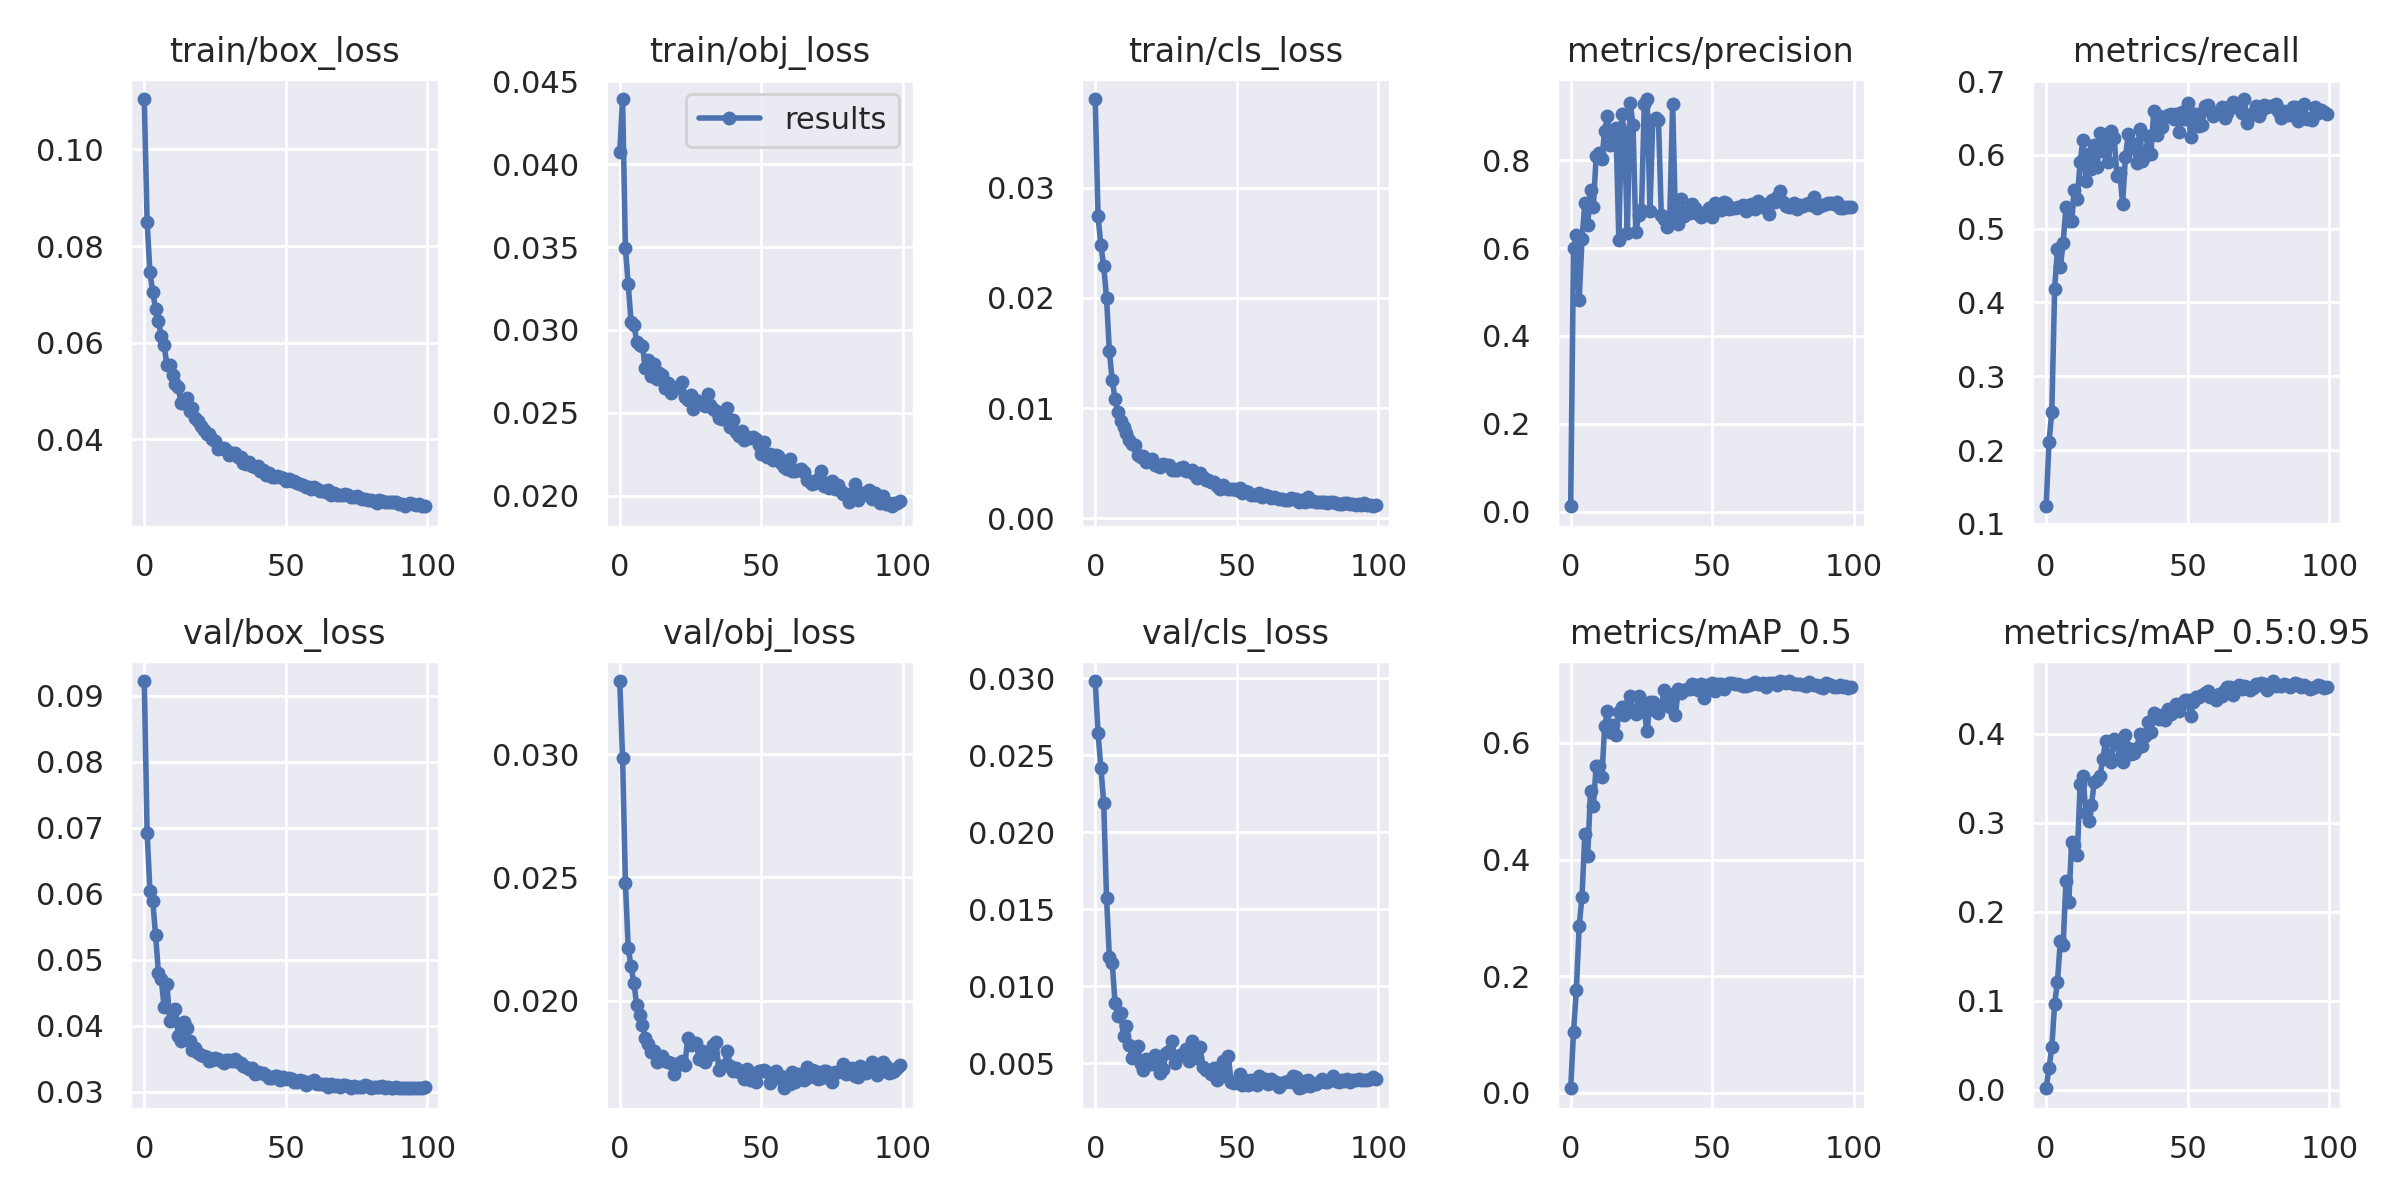

In [ ]:
Image(filename='/content/yolov5/runs/train/exp/results.png',width=1000)

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.4 --source /content/gdrive/MyDrive/KakaoTalk_20211209_000529786.mp4

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/gdrive/MyDrive/KakaoTalk_20211209_000529786.mp4, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-133-g4fb6dd4 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/1405) /content/gdrive/MyDrive/KakaoTalk_20211209_000529786.mp4: 256x416 1 helmet, Done. (0.024s)
video 1/1 (2/1405) /content/gdrive/MyDrive/KakaoTalk_20211209_000529786.mp4: 256x416 1 helmet, 1 ballcap, Done. (0.023s)
video 1/1 (3/1405) /content/gdrive/MyDrive/KakaoTalk_20211209_000529786.mp4: 256x416 1 helmet, 1 ballcap, Done. (0.023s)
video 1/1